## Chapter 8



### Gates Data

In [24]:
print("Ch 8: Qubit properties")
print("----------------------")

from qiskit import IBMQ

print("Getting providers...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

def select_backend():
    # Get all available and operational backends.
    print("Getting backends...")
    available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().num_qubits > 0 and b.status().operational)
    # Fish out criteria to compare
    print("{0:20} {1:<10}".format("Name","#Qubits"))
    print("{0:20} {1:<10}".format("----","-------"))        
    for n in range(0, len(available_backends)):
        backend = provider.get_backend(str(available_backends[n]))
        print("{0:20} {1:<10}".format(backend.name(),backend.configuration().num_qubits))
    select_backend=input("Select a backend ('exit' to end): ")
    if select_backend!="exit":
        backend = provider.get_backend(select_backend)
    else:
        backend=select_backend
    return(backend)

def display_information(backend):
    basis_gates=backend.configuration().basis_gates
    num_qubits=backend.configuration().num_qubits
    if num_qubits>1:
        coupling_map=backend.configuration().coupling_map
    else:
        coupling_map=[]
    micro=10**6

    for qubit in range(num_qubits):
        print("\nQubit:",qubit)
        print("T1:",int(backend.properties().t1(qubit)*micro),"\u03BCs")
        print("T2:",int(backend.properties().t2(qubit)*micro),"\u03BCs")
        print("Readout error:",round(backend.properties().readout_error(qubit)*100,2),"%")
        for bg in basis_gates:
            if bg!="cx" and bg!="reset":
                if backend.properties().gate_length(bg,[qubit])!=0:
                    print(bg,round(backend.properties().gate_length(bg,[0])*micro,2),"\u03BCs", "Err:",round(backend.properties().gate_error(bg,[qubit])*100,2),"%") 
                else:    
                    print(bg,round(backend.properties().gate_length(bg,[0])*micro,2),"\u03BCs", "Err:",round(backend.properties().gate_error(bg,[qubit])*100,2),"%")
        if num_qubits>0:
            for cm in coupling_map:
                if qubit in cm:
                    print("cx",cm,round(backend.properties().gate_length("cx",cm)*micro,2),"\u03BCs", "Err:",round(backend.properties().gate_error("cx",cm)*100,2),"%")
    
# Main 
def main():
    backend=select_backend()
    display_information(backend)

if __name__ == '__main__':
    main()

Ch 8: Qubit properties
----------------------
Getting providers...
Getting backends...
Name                 #Qubits   
----                 -------   
ibmq_lima            5         
ibmq_belem           5         
ibmq_quito           5         
ibmq_manila          5         
ibm_nairobi          7         
ibm_oslo             7         
Select a backend ('exit' to end): ibm_oslo

Qubit: 0
T1: 92 μs
T2: 120 μs
Readout error: 0.89 %
id 0.04 μs Err: 0.02 %
rz 0.0 μs Err: 0 %
sx 0.04 μs Err: 0.02 %
x 0.04 μs Err: 0.02 %
cx [0, 1] 0.34 μs Err: 0.83 %
cx [1, 0] 0.41 μs Err: 0.83 %

Qubit: 1
T1: 176 μs
T2: 33 μs
Readout error: 1.3 %
id 0.04 μs Err: 0.03 %
rz 0.0 μs Err: 0 %
sx 0.04 μs Err: 0.03 %
x 0.04 μs Err: 0.03 %
cx [0, 1] 0.34 μs Err: 0.83 %
cx [1, 0] 0.41 μs Err: 0.83 %
cx [1, 2] 0.25 μs Err: 0.88 %
cx [1, 3] 0.26 μs Err: 0.89 %
cx [2, 1] 0.21 μs Err: 0.88 %
cx [3, 1] 0.33 μs Err: 0.89 %

Qubit: 2
T1: 73 μs
T2: 27 μs
Readout error: 1.58 %
id 0.04 μs Err: 0.03 %
rz 0.0 μs Err: 0 %
s

### Compare Qubits

Ch 8: Comparing qubits on a chip
--------------------------------
Getting provider...
Name                 #Qubits    Pending jobs
----                 -------    ------------
ibmq_lima            5          532
ibmq_belem           5          91
ibmq_quito           5          151
ibmq_manila          5          134
ibm_nairobi          7          223
ibm_oslo             7          305
Select a backend ('LB' for least busy): LB
Selected backend: ibmq_manila
cx4_3 : gate_error = 0.005729949480894281
cx3_4 : gate_error = 0.005729949480894281
cx2_3 : gate_error = 0.006535741805789003
cx3_2 : gate_error = 0.006535741805789003
cx1_2 : gate_error = 0.010425086802104855
cx2_1 : gate_error = 0.010425086802104855
cx0_1 : gate_error = 0.005708963098714159
cx1_0 : gate_error = 0.005708963098714159
Best cx gate: [0, 1] , 0.571 %
Worst cx gate: [1, 2] , 1.043 %


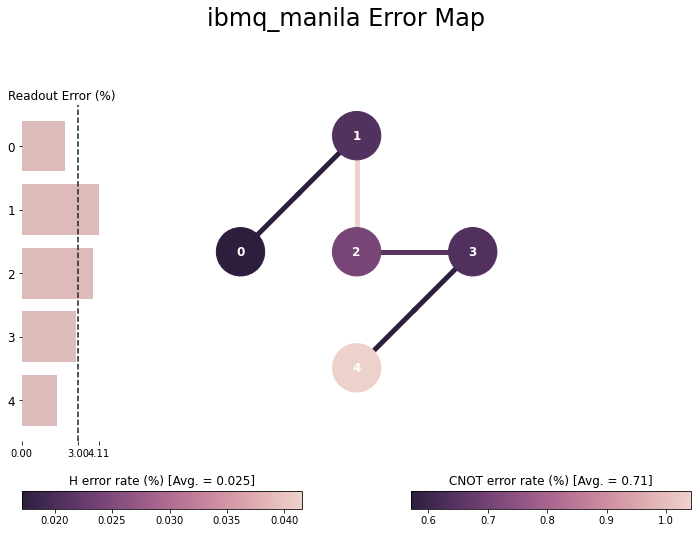

Building circuits...
Best CX:


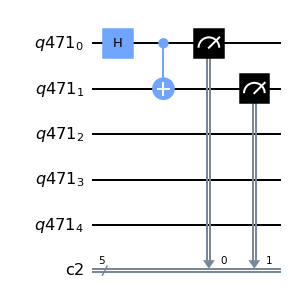

Transpiled qc_best circuit:


global phase: π/4
            ┌─────────┐┌────┐┌─────────┐     ┌─┐   
q471_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤M├───
            └─────────┘└────┘└─────────┘┌─┴─┐└╥┘┌─┐
q471_1 -> 1 ────────────────────────────┤ X ├─╫─┤M├
                                        └───┘ ║ └╥┘
q471_2 -> 2 ──────────────────────────────────╫──╫─
                                              ║  ║ 
q471_3 -> 3 ──────────────────────────────────╫──╫─
                                              ║  ║ 
q471_4 -> 4 ──────────────────────────────────╫──╫─
                                              ║  ║ 
      c2: 5/══════════════════════════════════╩══╩═
                                              0  1

Worst CX:


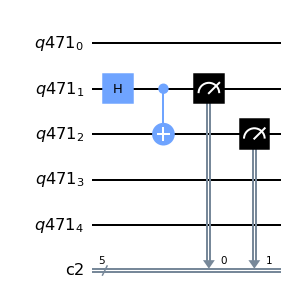

Comparing CX pairs...


Job Status: job is queued (31)    

KeyboardInterrupt: ignored

In [25]:
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram,plot_error_map
from qiskit.compiler import transpile


from IPython.core.display import display

print("Ch 8: Comparing qubits on a chip")
print("--------------------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()


def select_backend():
    # Get all available and operational backends.
    available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().n_qubits > 1 and b.status().operational)
    # Fish out criteria to compare
    print("{0:20} {1:<10} {2:<10}".format("Name","#Qubits","Pending jobs"))
    print("{0:20} {1:<10} {2:<10}".format("----","-------","------------"))        
    for n in range(0, len(available_backends)):
        backend = provider.get_backend(str(available_backends[n]))
        print("{0:20} {1:<10}".format(backend.name(),backend.configuration().n_qubits),backend.status().pending_jobs)
    select_backend=input("Select a backend ('LB' for least busy): ")
    if select_backend not in ["LB","lb"]:
        backend = provider.get_backend(str(select_backend))
    else:
        from qiskit.providers.ibmq import least_busy
        backend = least_busy(provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().n_qubits > 1 and b.status().operational))
    print("Selected backend:",backend.status().backend_name)
    return(backend)

def get_gate_info(backend):
    # Pull out the gates information.
    gates=backend.properties().gates
    
    #Cycle through the CX gate couplings to find the best and worst 
    cx_best_worst = [[[0,0],1],[[0,0],0]]
    for n in range (0, len(gates)):
        if gates[n].gate ==  "cx":
            print(gates[n].name, ":", gates[n].parameters[0].name,"=", gates[n].parameters[0].value)
            if cx_best_worst[0][1]>gates[n].parameters[0].value:
                cx_best_worst[0][1]=gates[n].parameters[0].value
                cx_best_worst[0][0]=gates[n].qubits
            if cx_best_worst[1][1]<gates[n].parameters[0].value:
                cx_best_worst[1][1]=gates[n].parameters[0].value
                cx_best_worst[1][0]=gates[n].qubits
    print("Best cx gate:", cx_best_worst[0][0], ",", round(cx_best_worst[0][1]*100,3),"%")
    print("Worst cx gate:", cx_best_worst[1][0], ",", round(cx_best_worst[1][1]*100,3),"%")
    display(plot_error_map(backend, show_title=True))
    return(cx_best_worst)

def create_circuits(backend, cx_best_worst):
    print("Building circuits...")
    q1 = QuantumRegister(backend.configuration().n_qubits)
    c1 = ClassicalRegister(backend.configuration().n_qubits)
    qc_best = QuantumCircuit(q1, c1)
    qc_worst = QuantumCircuit(q1, c1)
    
    #Best circuit
    qc_best.h(q1[cx_best_worst[0][0][0]])
    qc_best.cx(q1[cx_best_worst[0][0][0]], q1[cx_best_worst[0][0][1]])
    qc_best.measure(q1[cx_best_worst[0][0][0]], c1[0])
    qc_best.measure(q1[cx_best_worst[0][0][1]], c1[1])
    print("Best CX:")
    display(qc_best.draw('mpl'))
    trans_qc_best = transpile(qc_best, backend)
    print("Transpiled qc_best circuit:")
    display(trans_qc_best.draw())


    #Worst circuit
    qc_worst.h(q1[cx_best_worst[1][0][0]])
    qc_worst.cx(q1[cx_best_worst[1][0][0]], q1[cx_best_worst[1][0][1]])
    qc_worst.measure(q1[cx_best_worst[1][0][0]], c1[0])
    qc_worst.measure(q1[cx_best_worst[1][0][1]], c1[1])
    
    print("Worst CX:")
    display(qc_worst.draw('mpl'))
    
    return(qc_best,qc_worst)

def compare_cx(backend,qc_best,qc_worst):
    print("Comparing CX pairs...")

    job_best = execute(qc_best, backend, shots=8192)
    job_monitor(job_best)
    job_worst = execute(qc_worst, backend, shots=8192)
    job_monitor(job_worst)
    
    q = QuantumRegister(backend.configuration().n_qubits)
    c = ClassicalRegister(backend.configuration().n_qubits)
    qc = QuantumCircuit(q, c)
    
    qc.h(q[0])
    qc.cx(q[0], q[1])
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])

    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    
    best_result = job_best.result()
    counts_best  = best_result.get_counts(qc_best)
    print("Best qubit pair:")
    print(counts_best)

    worst_result = job_worst.result()
    counts_worst  = worst_result.get_counts(qc_worst)
    print("Worst qubit pair:")
    print(counts_worst)
    
    sim_result = job_sim.result()
    counts_sim  = sim_result.get_counts(qc)
    print("Simulated baseline:")
    print(counts_sim)
    
    display(plot_histogram([counts_best, counts_worst, counts_sim],
                           title = "Best and worst qubit pair for: " + backend.name(),
                           legend     = ["Best qubit pair","Worst qubit pair","Simulated baseline"],
                           sort       = 'desc',
                           figsize    = (15,12),
                           color      = ['green', 'red','blue'],
                           bar_labels = True))

def main():
    backend=select_backend()
    cx_best_worst=get_gate_info(backend)
    qc_best, qc_worst=create_circuits(backend, cx_best_worst)
    compare_cx(backend,qc_best,qc_worst)
       
if __name__ == '__main__':
    main()

### TIME

Ch 8: How many gates do I have time for
---------------------------------------
Getting providers...
Getting backends...
Name                 #Qubits    Pending jobs
----                 -------    ------------
ibmq_lima            5          533
ibmq_belem           5          92
ibmq_quito           5          146
ibmq_manila          5          136
ibm_nairobi          7          223
ibm_oslo             7          299
Select a backend:
ibmq_belem
Enter Q to run on the selected backend, S to run on the simulated backend:
S


/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_aer/noise/device/models.py:367: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (92038.51932346408 > 2 * 1930.8427613151282). Truncating to maximum value.
  " Truncating to maximum value.", UserWarning)
/usr/local/lib/python3.7/dist-packages/qiskit_

Building noise model...
Number of id gates:
2

Backend data:

Backend online since: 2021-01-08
Qubit: 0
T1: 122 μs
T2: 136 μs
Readout error: 1.43 %
Qubit 0 Id length: 0.036 μs
T1 -id = 121.93 μs 0 %

Sample 5-Id gate T1 circuit:


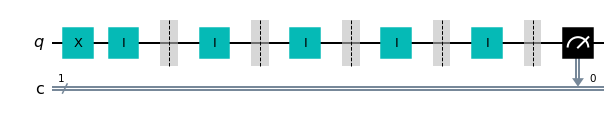


Running:
Results for simulator: {'1': 8192}
Results for 2 Id gates: {'0': 24, '1': 1000}


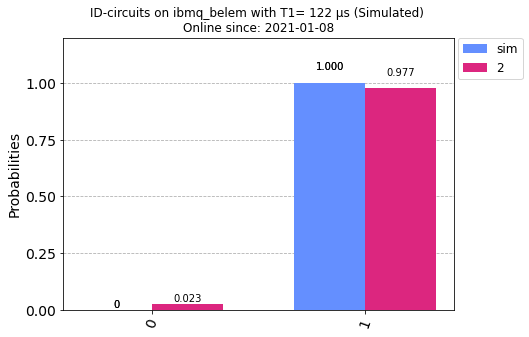

In [26]:
print("Ch 8: How many gates do I have time for")
print("---------------------------------------")

# Import Qiskit and load account
from qiskit import Aer, IBMQ, QuantumCircuit, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from IPython.core.display import display

print("Getting providers...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()


def select_backend():
    # Get all available and operational backends.
    print("Getting backends...")
    available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().n_qubits > 0 and b.status().operational)
    # Fish out criteria to compare
    print("{0:20} {1:<10} {2:<10}".format("Name","#Qubits","Pending jobs"))
    print("{0:20} {1:<10} {2:<10}".format("----","-------","------------"))
    for n in range(0, len(available_backends)):
        backend = provider.get_backend(str(available_backends[n]))
        print("{0:20} {1:<10}".format(backend.name(),backend.configuration().n_qubits),backend.status().pending_jobs)
    select_backend=input("Select a backend:\n")
    backend = provider.get_backend(select_backend)
    return(backend)

def display_information(backend,n_id,ttype):
    micro=10**6
    qubit=0
    T1=int(backend.properties().t1(qubit)*micro)
    T2=int(backend.properties().t2(qubit)*micro)
    id_len=backend.properties().gate_length("id",[0])*micro
    if ttype=="T1":
        T=T1
    else:
        T=T2
    print("\nBackend data:")
    print("\nBackend online since:",backend.configuration().online_date.strftime('%Y-%m-%d'))
    print("Qubit:",qubit)
    print("T1:",T1,"\u03BCs")
    print("T2:",T2,"\u03BCs")
    print("Readout error:",round(backend.properties().readout_error(qubit)*100,2),"%")
    print("Qubit",qubit,"Id length:",round(id_len,3),"\u03BCs") 
    print(ttype,"-id =", round(T-n_id*id_len,2),"\u03BCs",int((100*n_id*id_len)/T),"%")
    return(T)
        
def build_circuit(ttype,n_id):
    qc = QuantumCircuit(1,1)
    qc.x(0)
    if ttype in ["T2","t2"]:
        qc.h(0)
    for n in range(int(n_id)):
        qc.id(0)
        qc.barrier(0)
    if ttype in ["T2","t2"]:
        qc.h(0)
    qc.measure(0,0)
    return(qc)

def build_noise_model(backend):
    print("Building noise model...")
    # Construct the noise model from backend
    noise_model = NoiseModel.from_backend(backend)
    return(noise_model)
    
def execute_circuit(backend, circuit,noise_model, n_id):
    # Basis gates for the noise model
    basis_gates = noise_model.basis_gates
    # Coupling map
    coupling_map = backend.configuration().coupling_map 
    # Execute noisy simulation on QASM simulator and get counts
    noisy_counts = execute(circuit, Aer.get_backend('qasm_simulator'), noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result().get_counts(circuit)
    return(noisy_counts)

# Main 
def main():
    # Set the time type
    ttype="T1"
    # Select the backend to simulate or run on
    backend=select_backend()
    back_sim=input("Enter Q to run on the selected backend, S to run on the simulated backend:\n")
    if back_sim in ["Q","q"]:
        sim=False
    else:
        sim=True
        noise_model=build_noise_model(backend)
    n_id=int(input("Number of id gates:\n"))
    t=display_information(backend,n_id,ttype)
    qc=build_circuit(ttype,n_id)  
    # Print sample circuit
    print("\nSample 5-Id gate",ttype,"circuit:")
    display(build_circuit(ttype,5).draw('mpl'))

    # Run the circuit on a simulator
    job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=8192)
    results = job.result()
    sim_counts = results.get_counts()
    print("\nRunning:")
    print("Results for simulator:",sim_counts)
    # Run the circuit
    entry={'sim':sim_counts}
    legend=['sim']
    length=n_id
    while length!=0:
        qc=build_circuit(ttype,length)
        if sim:
            noisy_counts=execute_circuit(backend,qc,noise_model,length)
        else:
            job = execute(qc, backend=backend, shots=8192)
            job_monitor(job)
            results = job.result()
            noisy_counts = results.get_counts()
        print("Results for",length,"Id gates:",noisy_counts)
        entry.update({str(length):noisy_counts})
        legend.append(str(length))
        length=int(length/4)
    # Store  the results in an array
    results_array=[]
    for i in legend:
        results_array.append(entry[i])
    # Display the final results
    title="ID-circuits on "+str(backend)+" with "+ttype+"= "+str(t)+" \u03BCs"
    if sim:
        title+=" (Simulated)"
    title+=" \nOnline since: "+str(backend.configuration().online_date.strftime('%Y-%m-%d'))
    display(plot_histogram(results_array, legend=legend, title=title))

if __name__ == '__main__':
    main()

## IGNIS

Ch 8: Correct for the expected
------------------------------
Getting providers...
Name                 #Qubits    Pending jobs
----                 -------    ------------
ibmq_lima            5          533
ibmq_belem           5          92
ibmq_quito           5          146
ibmq_manila          5          132
ibm_nairobi          7          223
ibm_oslo             7          299
Select a backend ('exit' to end): ibmq_belem
Our circuit:


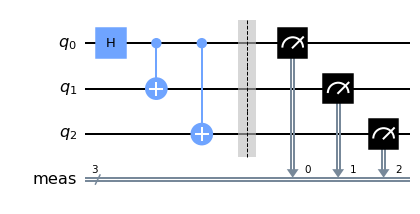

Job Status: job has successfully run
Simulator results:
 {'111': 4075, '000': 4117}
Job Status: job is queued (93)    

KeyboardInterrupt: ignored

In [27]:
print("Ch 8: Correct for the expected")
print("------------------------------")

# Import Qiskit and load account
from qiskit import Aer, IBMQ, QuantumRegister, execute

from qiskit import QuantumCircuit
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

from IPython.core.display import display

print("Getting providers...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

def select_backend():
    # Get all available and operational backends.
    available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().n_qubits > 1 and b.status().operational)
    # Fish out criteria to compare
    print("{0:20} {1:<10} {2:<10}".format("Name","#Qubits","Pending jobs"))
    print("{0:20} {1:<10} {2:<10}".format("----","-------","------------"))        
    for n in range(0, len(available_backends)):
        backend = provider.get_backend(str(available_backends[n]))
        print("{0:20} {1:<10}".format(backend.name(),backend.configuration().n_qubits),backend.status().pending_jobs)
    select_backend=input("Select a backend ('exit' to end): ")
    if select_backend!="exit":
        backend = provider.get_backend(select_backend)
    else:
        backend=select_backend
    return(backend)

def create_circuit():
     #Create the circuit
    circuit = QuantumCircuit(3)
    circuit.h(0)
    circuit.cx(0,1)
    circuit.cx(0,2) 

    circuit.measure_all()
    print("Our circuit:")
    display(circuit.draw('mpl'))
    return(circuit)

def simulator_results(circuit):
    # Run the circuit on the local simulator
    job = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=8192)
    job_monitor(job)
    results = job.result()
    sim_counts = results.get_counts()
    print("Simulator results:\n",sim_counts)
    return(sim_counts)

def noisy_results(circuit,backend):
    # Select backend and run the circuit
    
    job = execute(circuit, backend=backend, shots=8192)
    job_monitor(job)
    results = job.result()
    noisy_counts = results.get_counts()
    print(backend,"results:\n",noisy_counts)
    return(noisy_counts,results)

def mitigated_results(circuit,backend,results):
    # Import the required methods
    from qiskit.providers.aer.noise import NoiseModel
    from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)
    
    # Get noise model for backend
    noise_model = NoiseModel.from_backend(backend)
    
    # Create the measurement fitter
    qr = QuantumRegister(circuit.num_qubits)
    meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')
    job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=8192, noise_model=noise_model)
    cal_results = job.result()
    meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
    #print(meas_fitter.cal_matrix)
    
    # Plot the calibration matrix
    print("Calibration matrix")
    meas_fitter.plot_calibration()
    
    # Get the filter object
    meas_filter = meas_fitter.filter
    
    # Results with mitigation
    mitigated_results = meas_filter.apply(results)
    mitigated_counts = mitigated_results.get_counts(0)
    print("Mitigated",backend,"results:\n",mitigated_counts)
    return(mitigated_counts)

def main():
    backend=select_backend()
    circ=create_circuit()
    sim_counts=simulator_results(circ)
    noisy_counts,results=noisy_results(circ,backend)
    # Analyze and error correct the measurements 
    mitigated_counts=mitigated_results(circ,backend,results)
        
    # Show all results as a comparison
    print("Final results:")
    display(plot_histogram([sim_counts, noisy_counts, mitigated_counts], legend=['sim','noisy', 'mitigated']))
       
if __name__ == '__main__':
    main()

## Shor


Chapter 8: Shor Code
---------------------
Select an error:
1. Bit flip
2. Bit flip plus phase flip
3. Theta plus phi shift
4. Random
4

Original qubit, in state |0>


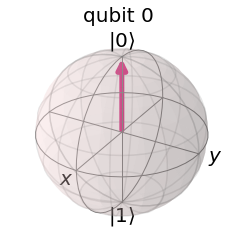

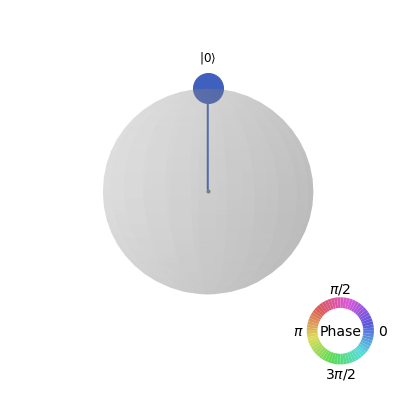


Qubit with error...


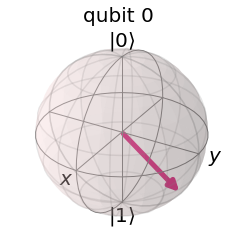

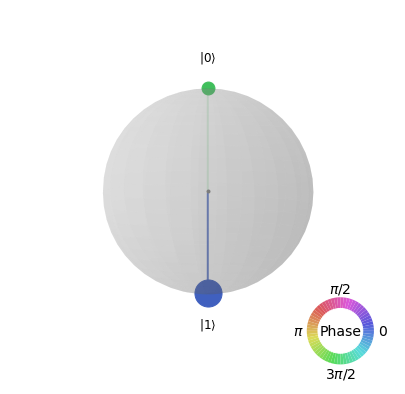

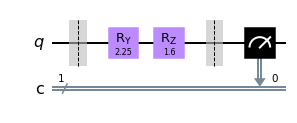


Result of qubit error:
-----------------------
{'1': 831, '0': 169}
Press enter for error correction...


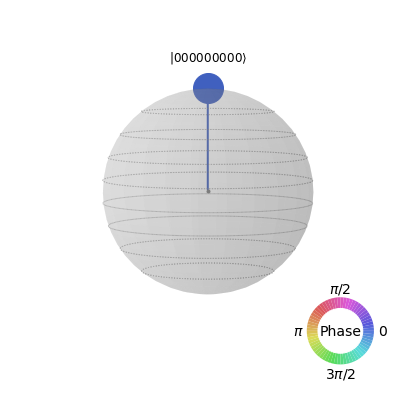

Qubit with error... LSB can be in |...0> and in |...1>, with various phase.


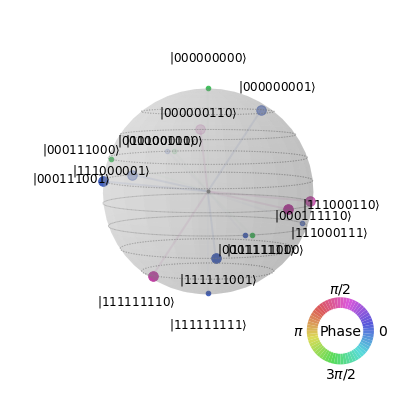

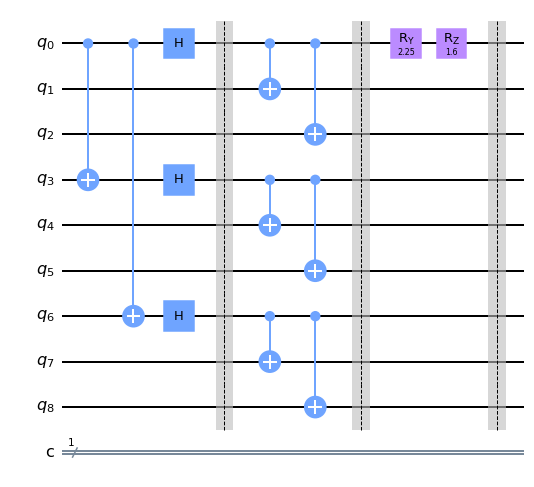

Error corrected qubit... LSB in |...0> with phase 0.


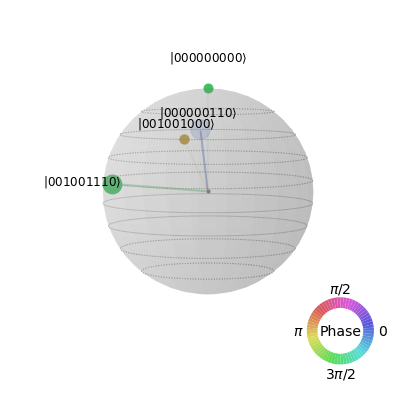

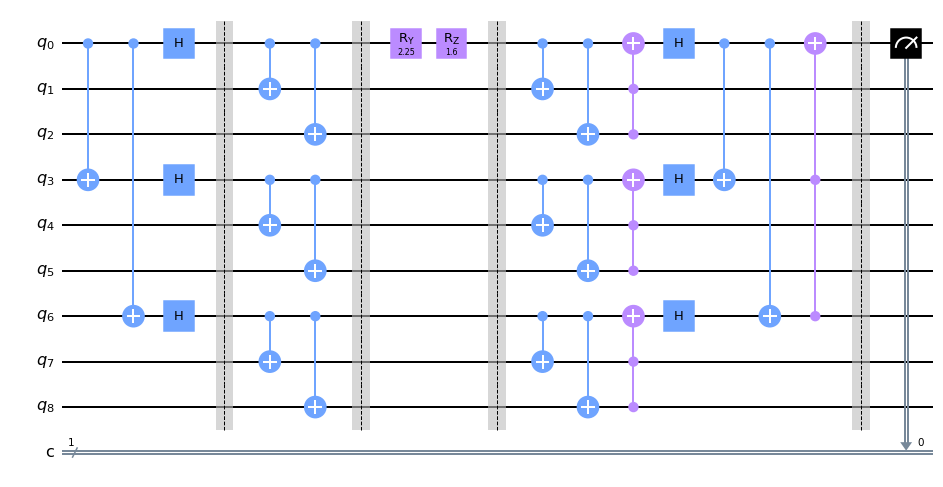


Result of qubit error after Shor code correction:
--------------------------------------------------
{'0': 1000}
Select an error:
1. Bit flip
2. Bit flip plus phase flip
3. Theta plus phi shift
4. Random
0

Original qubit, in state |0>


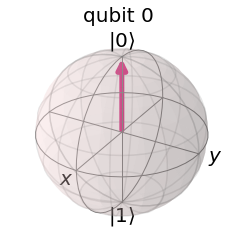

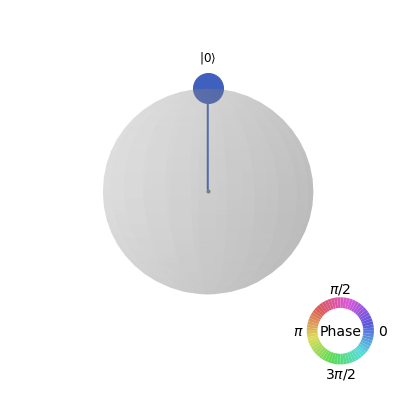


Qubit with error...


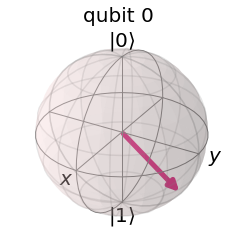

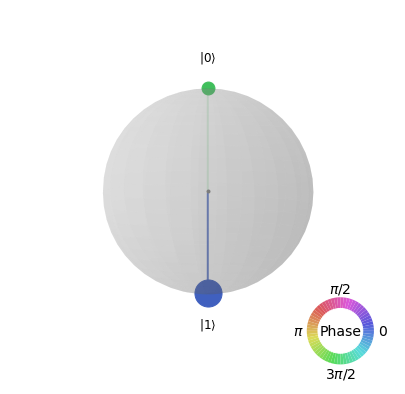

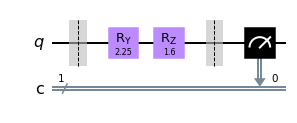


Result of qubit error:
-----------------------
{'0': 185, '1': 815}
Press enter for error correction...

Original LSB qubit, in state |...0>


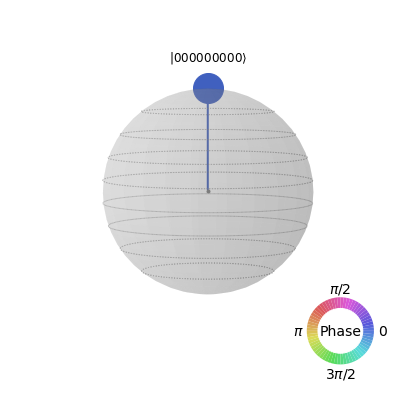

Qubit with error... LSB can be in |...0> and in |...1>, with various phase.


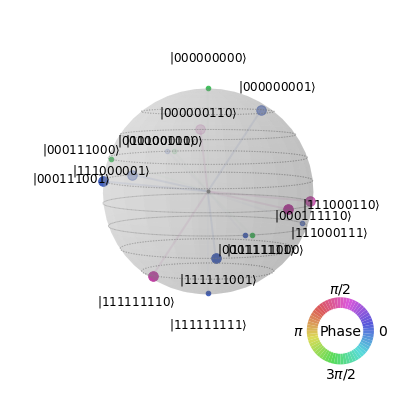

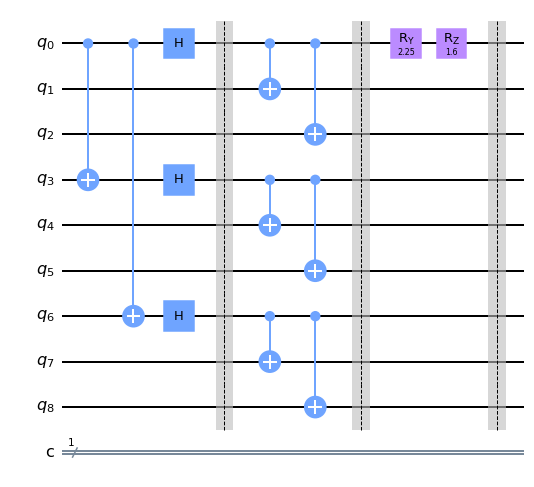

Error corrected qubit... LSB in |...0> with phase 0.


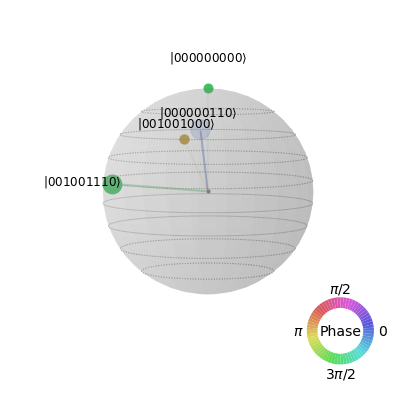

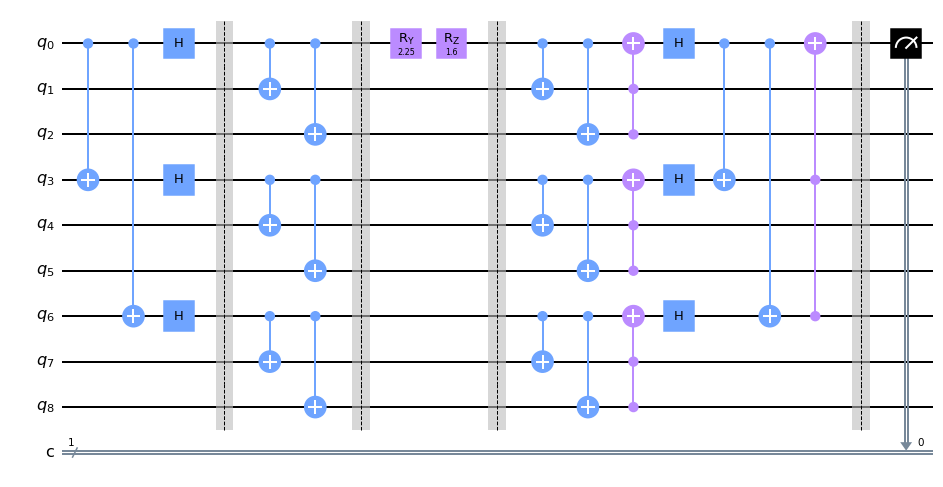


Result of qubit error after Shor code correction:
--------------------------------------------------
{'0': 1000}


In [28]:
print('\nChapter 8: Shor Code')
print('---------------------')

from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

# Supporting methods
from math import pi
from random import random
from IPython.core.display import display

# Set the Aer simulator backend
backend = Aer.get_backend('qasm_simulator')

# Function that returns the state vector (Psi) for the qc
def get_psi(qc):
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    result = execute(qc, backend).result()
    psi = result.get_statevector(qc)
    return(psi) 

# Function that adds an error to the first qubit
def add_error(error, circuit,ry_error, rz_error):
    circuit.barrier([x for x in range(circuit.num_qubits)])
    if error=="1": #Bit flip error
        circuit.x(0)
    elif error=="2": #Bit flip plus phase flip error
        circuit.x(0)
        circuit.z(0)
    else: #Theta plus phi shift and Random    
        circuit.ry(ry_error,0)
        circuit.rz(rz_error,0)
    circuit.barrier([x for x in range(circuit.num_qubits)])
    return(circuit)

def not_corrected(error, ry_error, rz_error):
    # Non-corrected code
    qco = QuantumCircuit(1,1)
    print("\nOriginal qubit, in state |0>")
    display(plot_bloch_multivector(get_psi(qco)))
    display(plot_state_qsphere(get_psi(qco)))
    # Add error
    add_error(error,qco, ry_error, rz_error)
    
   
    print("\nQubit with error...")
    display(plot_bloch_multivector(get_psi(qco)))
    display(plot_state_qsphere(get_psi(qco)))
    
    qco.measure(0,0)
    display(qco.draw('mpl'))
    
    job = execute(qco, backend, shots=1000)        
    counts = job.result().get_counts()
    
    print("\nResult of qubit error:")
    print("-----------------------")
    print(counts)

def shor_corrected(error, ry_error, rz_error):    
    # A combination of a three qubit phase flip code, and 3 bit flip codes
    
    qc = QuantumCircuit(9,1)
    
    print("\nOriginal LSB qubit, in state |...0>")
    display(plot_state_qsphere(get_psi(qc)))
    
    # Start of phase flip code
    qc.cx(0,3)
    qc.cx(0,6)
    
    qc.h(0)
    qc.h(3)
    qc.h(6)
    
    qc.barrier([x for x in range(qc.num_qubits)])
    
    # Start of bit flip codes
    qc.cx(0,1)
    qc.cx(3,4)
    qc.cx(6,7)
    
    qc.cx(0,2)
    qc.cx(3,5)
    qc.cx(6,8)
            
    # Error code
    add_error(error,qc, ry_error, rz_error)
    
    print("Qubit with error... LSB can be in |...0> and in |...1>, with various phase.")
    display(plot_state_qsphere(get_psi(qc)))
    display(qc.draw('mpl'))
    
    # End of bit flip codes

    qc.cx(0,1)
    qc.cx(3,4)
    qc.cx(6,7)
    
    qc.cx(0,2)
    qc.cx(3,5)
    qc.cx(6,8)
    
    qc.ccx(1,2,0)
    qc.ccx(4,5,3)
    qc.ccx(8,7,6)
    
    # End of phase flip code
    
    qc.h(0)
    qc.h(3)
    qc.h(6)
    
    qc.cx(0,3)
    qc.cx(0,6)
    qc.ccx(6,3,0)
    
    qc.barrier([x for x in range(qc.num_qubits)])

    qc.measure(0,0)
    
    print("Error corrected qubit... LSB in |...0> with phase 0.")
    display(plot_state_qsphere(get_psi(qc)))
    display(qc.draw('mpl'))
    
    job = execute(qc, backend, shots=1000)        
    counts = job.result().get_counts()
    
    print("\nResult of qubit error after Shor code correction:")
    print("--------------------------------------------------")
    print(counts)
    

def main():
    error="1"
    ry_error=0
    rz_error=0
    while error!="0":
        error=input("Select an error:\n1. Bit flip\n2. Bit flip plus phase flip\n3. Theta plus phi shift\n4. Random\n")
        if error=="3":
            ry_error=float(input("Enter theta:\n"))
            rz_error=float(input("Enter phi:\n"))
        if error=="4":
            ry_error=pi*random()
            rz_error=2*pi*random()
        not_corrected(error, ry_error, rz_error)
        input("Press enter for error correction...")
        shor_corrected(error, ry_error, rz_error)
       
if __name__ == '__main__':
    main()